## Problem Statement 2: Overfitting and Underfitting Analysis using Regression/Classification Models

In this task, a detailed analysis of overfitting and underfitting issues using various regression/classification models on multiple datasets are performed.


### **Dataset Selection and Preparation**:
   - Downloaded the following datasets:
     - [Mobile Price Classification Dataset](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)
     - [Housing Price Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction)
     - [Melbourne Housing Snapshot Dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### **Load Datasets**

In [2]:
df = pd.read_csv('housing_train.csv')

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Data Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Print null columns
print(df.columns[df.isnull().any()].tolist())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
# Category columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [7]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Fill numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [10]:
# Assign numerical labels to categorical columns and its values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

# save the new data as a new csv file
df.to_csv('housing_train_cleaned.csv', index=False)



In [11]:
data = pd.read_csv('housing_train_cleaned.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


### Normalizations

In [12]:
# Normalize required columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']] = scaler.fit_transform(data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,0.150685,0.033420,1,0,3,3,0,...,0.0,2,2,2,0.0,0.090909,0.50,8,4,208500
1,2,20,3,0.202055,0.038795,1,0,3,3,0,...,0.0,2,2,2,0.0,0.363636,0.25,8,4,181500
2,3,60,3,0.160959,0.046507,1,0,0,3,0,...,0.0,2,2,2,0.0,0.727273,0.50,8,4,223500
3,4,70,3,0.133562,0.038561,1,0,0,3,0,...,0.0,2,2,2,0.0,0.090909,0.00,8,0,140000
4,5,60,3,0.215753,0.060576,1,0,0,3,0,...,0.0,2,2,2,0.0,1.000000,0.50,8,4,250000


### Feature Selections

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'data' is your DataFrame and it has been defined already

# Separate features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Determine the optimal number of features using cross-validation
def select_best_features(X, y):
    best_score = -np.inf
    best_k = 0
    for k in range(1, X.shape[1] + 1):
        select_k_best = SelectKBest(score_func=f_regression, k=k)
        X_new = select_k_best.fit_transform(X, y)
        score = np.mean(cross_val_score(LinearRegression(), X_new, y, cv=5))
        if score > best_score:
            best_score = score
            best_k = k
    return best_k

# Find the optimal number of features
optimal_k = select_best_features(X, y)

# Select the best K features
best_features = SelectKBest(score_func=f_regression, k=optimal_k)
fit = best_features.fit(X, y)

# Get the scores and feature names
scores = fit.scores_
feature_names = X.columns

# Create a DataFrame with feature scores
df_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the DataFrame by scores
df_scores = df_scores.sort_values(by='Score', ascending=False)

# Select top features based on optimal_k
top_features = df_scores.head(optimal_k)['Feature']
X_selected = X[top_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Print the selected top features
print("Optimal number of features:", optimal_k)
print("Selected features:\n", top_features.tolist())
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)





Optimal number of features: 59
Selected features:
 ['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'HeatingQC', 'BsmtFinSF1', 'Foundation', 'LotFrontage', 'WoodDeckSF', 'MasVnrType', '2ndFlrSF', 'OpenPorchSF', 'GarageType', 'BsmtExposure', 'HalfBath', 'LotArea', 'LotShape', 'CentralAir', 'Electrical', 'PavedDrive', 'BsmtFullBath', 'RoofStyle', 'BsmtUnfSF', 'SaleCondition', 'Neighborhood', 'HouseStyle', 'BedroomAbvGr', 'MSZoning', 'PoolQC', 'KitchenAbvGr', 'GarageCond', 'RoofMatl', 'EnclosedPorch', 'ExterCond', 'Functional', 'ScreenPorch', 'Exterior2nd', 'Exterior1st', 'Heating', 'GarageQual', 'PoolArea', 'BsmtFinType1', 'Condition1', 'BldgType', 'MSSubClass', 'OverallCond']
Shape of training data: (1168, 59)
Shape of testing data: (292, 59)


### Data Visualizations

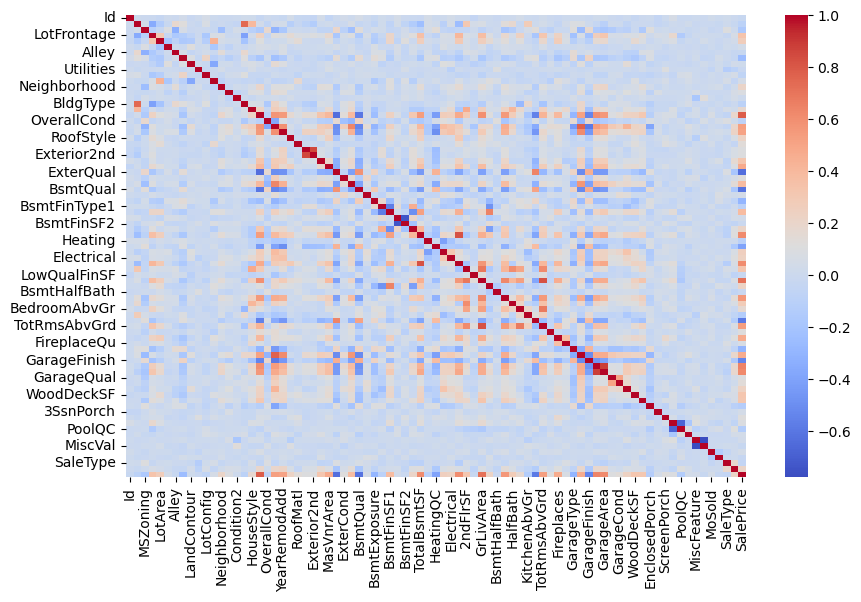

In [14]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()


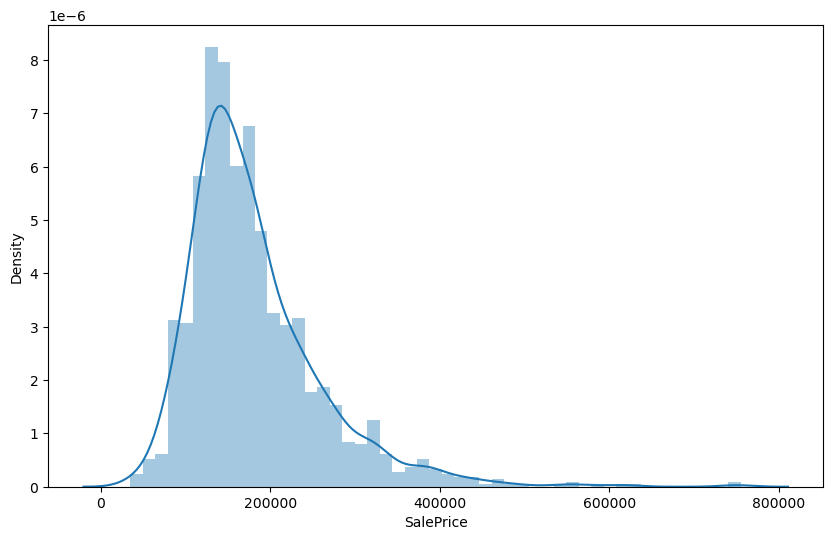

In [15]:
#Data Visualizations
plt.figure(figsize=(10, 6))
sns.distplot(data['SalePrice'])
plt.show()


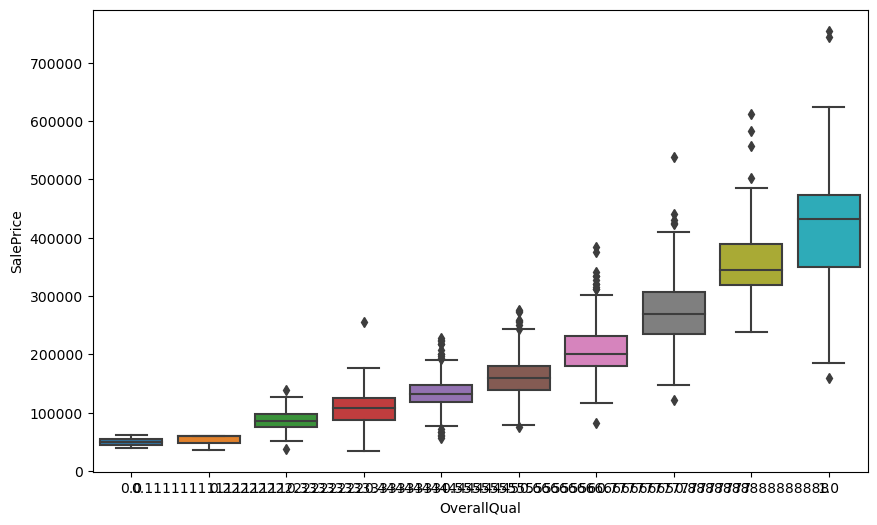

In [16]:
# Data Visulaizations
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.show()

### Model Building and Model Evaluation

Train MSE:  848335698.9644967
Train MAE:  18433.40582884764
Test MSE:  1249212973.3111918
Test MAE:  21598.396867592855


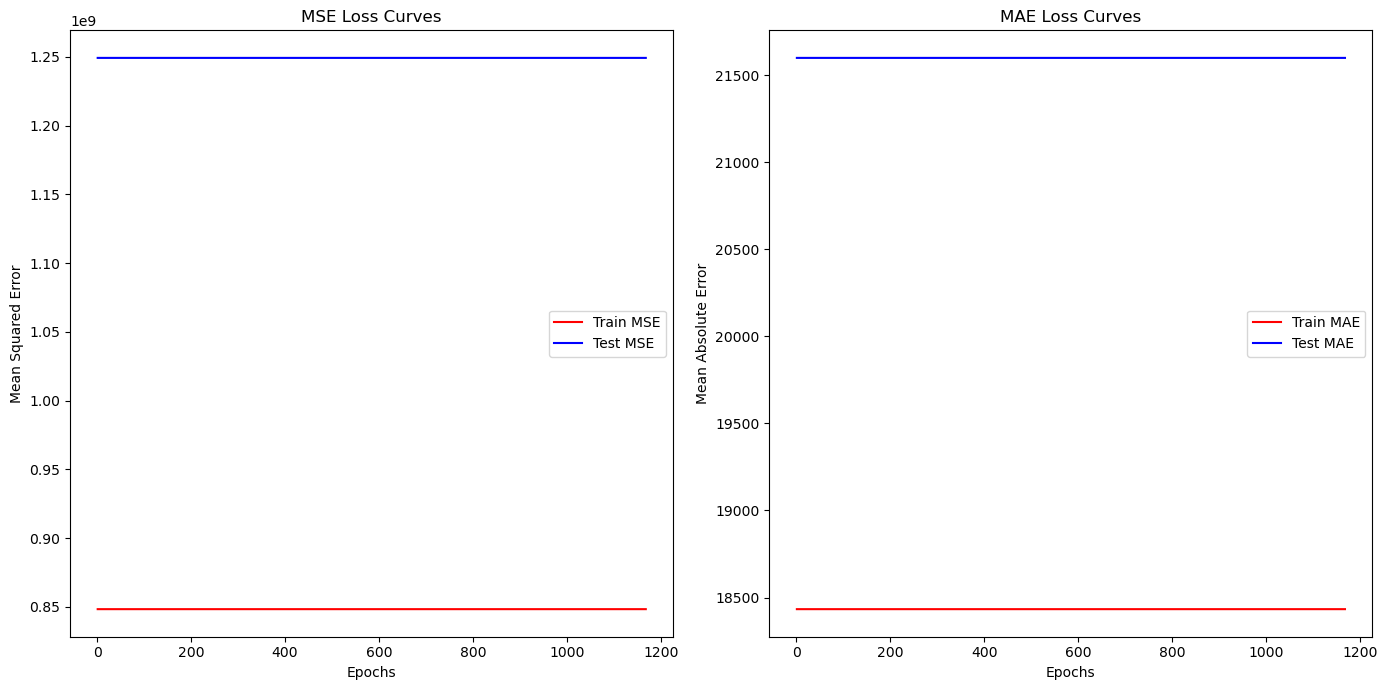

In [18]:
# Model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target on the training and testing sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)


test_mse = mean_squared_error(y_test, test_preds)

test_mae = mean_absolute_error(y_test, test_preds)

print("Train MSE: ", train_mse)
print("Train MAE: ", train_mae)
print("Test MSE: ", test_mse)
print("Test MAE: ", test_mae)





In [17]:
# Decission Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

# Predict the target on the training and testing sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate the model

train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)

test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print("Train MSE: ", train_mse)
print("Train MAE: ", train_mae)
print("Test MSE: ", test_mse)
print("Test MAE: ", test_mae)



Train MSE:  0.0
Train MAE:  0.0
Test MSE:  1480035696.7191782
Test MAE:  26231.719178082192


In [35]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = RandomForestRegressor(random_state=42)


model.fit(X_train, y_train)

# Predict the target on the training and testing sets

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)

test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print("Train MSE: ", train_mse)
print("Train MAE: ", train_mae)
print("Test MSE: ", test_mse)
print("Test MAE: ", test_mae)



Train MSE:  123469182.38199537
Train MAE:  6574.872482876713
Test MSE:  836543053.3953608
Test MAE:  17852.395


### Conclusion


The analysis demonstrates that while machine learning models like Decision Tree Regressor and Random Forest Regressor can be trained to predict housing prices, their performance can vary significantly between training and testing sets. The high discrepancy between training and testing errors, especially in the Decision Tree Regressor, suggests potential overfitting. To improve the models' generalizability, further hyperparameter tuning, cross-validation, and possibly ensemble methods could be explored. The insights gained from EDA and feature importance analysis can guide feature engineering efforts to enhance model performance